In [18]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
import math
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [5]:
jobs1_exp = []
jobs2_exp = []
jobs3_exp = []
jobs4_exp = []

recomm1_exp = []
recomm2_exp = []
recomm3_exp = []
recomm4_exp = []

for i in range(100):
    jobs1_exp.append(mongo_db["branin_1-%d.jobs"%i])
    jobs2_exp.append(mongo_db["branin_2-%d.jobs"%i])
    jobs3_exp.append(mongo_db["branin_3-%d.jobs"%i])
    jobs4_exp.append(mongo_db["branin_4-%d.jobs"%i])
    
    recomm1_exp.append(mongo_db["branin_1-%d.recommendations"%i])
    recomm2_exp.append(mongo_db["branin_2-%d.recommendations"%i])
    recomm3_exp.append(mongo_db["branin_3-%d.recommendations"%i])
    recomm4_exp.append(mongo_db["branin_4-%d.recommendations"%i])

In [8]:
branin1_objs = functions.get_objective(recomm1_exp)
branin2_objs = functions.get_objective(recomm2_exp)
branin3_objs = functions.get_objective(recomm3_exp)
branin4_objs = functions.get_objective(recomm4_exp)

In [9]:
branin1_objs = np.average(branin1_objs, axis = 0)
branin2_objs = np.average(branin2_objs, axis = 0)
branin3_objs = np.average(branin3_objs, axis = 0)
branin4_objs = np.average(branin4_objs, axis = 0)

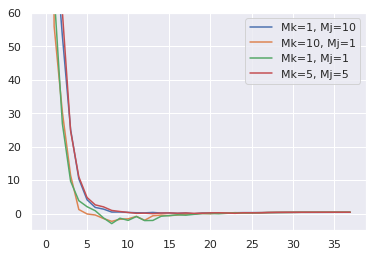

In [15]:
plt.plot(branin1_objs[:-2],label='Mk=1, Mj=10')
plt.plot(branin2_objs[:-2],label='Mk=10, Mj=1')
plt.plot(branin3_objs[:-2],label='Mk=1, Mj=1')
plt.plot(branin4_objs[:-2],label='Mk=5, Mj=5')
plt.ylim(-5,60)
plt.legend()

### Getting Immediate Regret IR measure

In [33]:
def branin(x, y):

    result = np.square(y - (5.1/(4*np.square(math.pi)))*np.square(x) + 
         (5/math.pi)*x - 6) + 10*(1-(1./(8*math.pi)))*np.cos(x) + 10
    
    result = float(result)
    
    #print 'Result = %f' % result
    #time.sleep(np.random.randint(60))
    return result

In [21]:
opt_val = branin(-np.pi, 12.275)

Result = 0.397887


In [30]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - branin(*input_list)))

In [23]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for locs in locs_cur_exp:
            irs_iter.append(log_ir(locs))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [24]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs



In [25]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [26]:
def get_median_irs2(irs_exp):
    median_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [31]:
locs1_exp = functions.get_recomm(recomm1_exp)
locs2_exp = functions.get_recomm(recomm2_exp)
locs3_exp = functions.get_recomm(recomm3_exp)
locs4_exp = functions.get_recomm(recomm4_exp)

In [32]:
irs1_exp = get_irs_whole_exp(locs1_exp)
irs2_exp = get_irs_whole_exp(locs2_exp)
irs3_exp = get_irs_whole_exp(locs3_exp)
irs4_exp = get_irs_whole_exp(locs4_exp)

Result = 58.317078
Result = 49.255901
Result = 3.317485
Result = 11.037609
Result = 17.514604
Result = 12.063507
Result = 25.051623
Result = 1.495722
Result = 0.944357
Result = 10.734038
Result = 2.549703
Result = 1.398264
Result = 2.090544
Result = 3.527253
Result = 1.952722
Result = 0.941379
Result = 0.823948
Result = 0.876232
Result = 0.647875
Result = 0.480652
Result = 0.440966
Result = 0.399602
Result = 1.179085
Result = 0.399559
Result = 0.399217
Result = 0.399159
Result = 0.399042
Result = 0.399005
Result = 0.397975
Result = 0.397970
Result = 0.397990
Result = 0.398011
Result = 0.397974
Result = 0.397978
Result = 0.398077
Result = 0.398030
Result = 0.398031
Result = 0.398013
Result = 0.398015
Result = 0.398014
Result = 90.775236
Result = 174.946908
Result = 66.885905
Result = 6.829139
Result = 3.358747
Result = 1.946180
Result = 0.931156
Result = 1.946548
Result = 0.440305
Result = 0.489470
Result = 0.405905
Result = 0.437133
Result = 0.399312
Result = 0.398608
Result = 0.398484

Result = 32.574027
Result = 4.876386
Result = 2.236957
Result = 2.014318
Result = 0.551070
Result = 0.593547
Result = 0.664555
Result = 0.402375
Result = 0.405658
Result = 0.401311
Result = 7.967055
Result = 0.486960
Result = 0.510163
Result = 0.452708
Result = 0.402989
Result = 0.398385
Result = 0.397931
Result = 0.398157
Result = 0.398158
Result = 0.397964
Result = 0.519424
Result = 0.398222
Result = 0.398237
Result = 0.397893
Result = 0.397894
Result = 0.397890
Result = 0.397890
Result = 0.397893
Result = 0.397888
Result = 0.397888
Result = 0.397889
Result = 0.397891
Result = 0.397888
Result = 0.397888
Result = 0.397888
Result = 49.426894
Result = 110.033147
Result = 117.788206
Result = 69.625357
Result = 47.984709
Result = 7.593874
Result = 2.489751
Result = 1.943286
Result = 1.944479
Result = 0.564853
Result = 0.400790
Result = 0.400795
Result = 0.411604
Result = 0.405145
Result = 0.401899
Result = 0.399067
Result = 0.398764
Result = 0.418531
Result = 0.449399
Result = 0.414649
Re

Result = 20.810704
Result = 2.006827
Result = 1.692807
Result = 2.955090
Result = 1.462178
Result = 0.717421
Result = 3.867015
Result = 3.178275
Result = 3.300227
Result = 1.747548
Result = 1.954666
Result = 1.957534
Result = 1.956586
Result = 0.997606
Result = 0.848988
Result = 0.639652
Result = 0.398876
Result = 0.400341
Result = 0.398992
Result = 0.398536
Result = 0.398540
Result = 0.398683
Result = 0.399136
Result = 0.405454
Result = 0.398234
Result = 0.398727
Result = 0.401255
Result = 0.440040
Result = 0.400178
Result = 0.399954
Result = 0.398903
Result = 0.399104
Result = 0.398992
Result = 0.398159
Result = 0.398167
Result = 0.398099
Result = 0.398222
Result = 0.398245
Result = 27.074606
Result = 9.596656
Result = 50.317244
Result = 9.372160
Result = 50.089931
Result = 15.438795
Result = 6.922032
Result = 3.987434
Result = 2.329181
Result = 1.943210
Result = 2.115894
Result = 11.615003
Result = 0.583962
Result = 0.576202
Result = 0.463125
Result = 0.600354
Result = 20.748850
Res

Result = 10.960889
Result = 2.547110
Result = 1.174577
Result = 0.399309
Result = 0.636580
Result = 0.421849
Result = 0.401872
Result = 0.433408
Result = 0.519391
Result = 0.425808
Result = 0.432573
Result = 0.405553
Result = 0.402838
Result = 0.403087
Result = 0.403225
Result = 0.402526
Result = 0.403186
Result = 0.402956
Result = 0.649602
Result = 0.557136
Result = 0.673352
Result = 0.401397
Result = 0.401878
Result = 0.399828
Result = 0.410973
Result = 0.403938
Result = 0.400889
Result = 0.398086
Result = 0.398294
Result = 0.398119
Result = 0.398188
Result = 0.398403
Result = 0.397974
Result = 0.397979
Result = 31.750885
Result = 18.205424
Result = 5.604527
Result = 3.404664
Result = 76.604579
Result = 3.686895
Result = 2.928778
Result = 3.406930
Result = 0.436670
Result = 5.662964
Result = 6.013324
Result = 17.741219
Result = 18.433967
Result = 10.960889
Result = 2.172324
Result = 10.960889
Result = 0.553073
Result = 2.075337
Result = 0.518405
Result = 0.405742
Result = 0.561444
Re

Result = 67.954996
Result = 3.023955
Result = 3.082914
Result = 9.434566
Result = 10.960889
Result = 2.014419
Result = 5.612475
Result = 0.700194
Result = 1.596578
Result = 10.960889
Result = 2.616843
Result = 4.232598
Result = 3.507635
Result = 3.642742
Result = 0.737073
Result = 3.723257
Result = 0.560879
Result = 1.847938
Result = 0.471750
Result = 0.408645
Result = 1.316670
Result = 1.289605
Result = 0.449632
Result = 0.467718
Result = 0.457010
Result = 0.476070
Result = 0.435341
Result = 0.438009
Result = 0.400719
Result = 0.399962
Result = 0.398664
Result = 0.400289
Result = 0.398177
Result = 0.397987
Result = 0.397965
Result = 0.398005
Result = 0.397902
Result = 0.397910
Result = 0.397910
Result = 2.039084
Result = 31.909008
Result = 17.508300
Result = 9.904047
Result = 20.168688
Result = 18.279160
Result = 20.000911
Result = 3.466260
Result = 7.568394
Result = 5.392414
Result = 9.478224
Result = 3.714187
Result = 1.958994
Result = 2.096720
Result = 1.943487
Result = 1.697937
Re

Result = 12.685636
Result = 15.732168
Result = 25.112425
Result = 2.540379
Result = 2.360823
Result = 2.081432
Result = 0.937684
Result = 1.948411
Result = 19.697228
Result = 19.607904
Result = 1.111324
Result = 0.402862
Result = 0.402274
Result = 0.966523
Result = 0.439528
Result = 0.433174
Result = 0.417216
Result = 0.923042
Result = 0.403508
Result = 8.599121
Result = 0.404900
Result = 0.401462
Result = 0.399694
Result = 0.399374
Result = 0.399243
Result = 0.398547
Result = 0.444612
Result = 0.398584
Result = 0.400040
Result = 0.398732
Result = 0.403736
Result = 0.397908
Result = 0.398002
Result = 0.398006
Result = 69.534861
Result = 84.976339
Result = 84.241740
Result = 3.965967
Result = 5.897163
Result = 1.735453
Result = 9.314464
Result = 2.346287
Result = 0.621633
Result = 16.828902
Result = 16.003594
Result = 4.028774
Result = 4.951968
Result = 2.392286
Result = 2.192794
Result = 2.333790
Result = 1.943161
Result = 0.688385
Result = 0.454496
Result = 0.423111
Result = 0.421234


Result = 1.456078
Result = 0.892391
Result = 2.184420
Result = 2.111365
Result = 1.172978
Result = 0.908078
Result = 2.307553
Result = 2.138787
Result = 1.943172
Result = 0.421922
Result = 0.407332
Result = 0.411331
Result = 0.408546
Result = 0.803473
Result = 0.415486
Result = 0.416459
Result = 0.412228
Result = 0.409179
Result = 0.398499
Result = 0.398350
Result = 0.398374
Result = 0.398414
Result = 0.398458
Result = 0.398481
Result = 0.398504
Result = 0.398161
Result = 0.398265
Result = 0.398374
Result = 0.398187
Result = 0.398229
Result = 0.398294
Result = 0.398347
Result = 0.398325
Result = 0.398262
Result = 0.398140
Result = 0.398153
Result = 14.272360
Result = 11.520735
Result = 6.478698
Result = 6.420276
Result = 2.012996
Result = 1.813712
Result = 1.379585
Result = 2.064736
Result = 0.409536
Result = 0.428090
Result = 0.403327
Result = 0.400063
Result = 0.400541
Result = 0.401303
Result = 0.399928
Result = 0.398201
Result = 0.397996
Result = 0.397961
Result = 0.397924
Result =

In [34]:
irs1_median = get_median_irs(irs1_exp)
irs2_median = get_median_irs(irs2_exp)
irs3_median = get_median_irs(irs3_exp)
irs4_median = get_median_irs(irs4_exp)

In [35]:
irs1_avg = get_avg_irs(irs1_exp)
irs2_avg = get_avg_irs(irs2_exp)
irs3_avg = get_avg_irs(irs3_exp)
irs4_avg = get_avg_irs(irs4_exp)

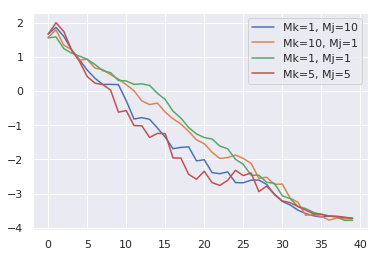

In [36]:
plt.plot(irs1_median, label = 'Mk=1, Mj=10')
plt.plot(irs2_median, label = 'Mk=10, Mj=1')
plt.plot(irs3_median, label = 'Mk=1, Mj=1')
plt.plot(irs4_median, label = 'Mk=5, Mj=5')
plt.legend()

plt.legend()

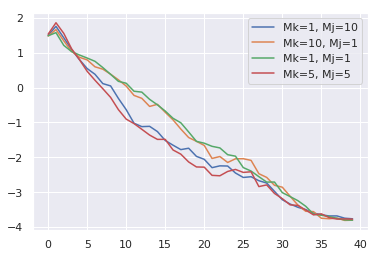

In [37]:
plt.plot(irs1_avg, label = 'Mk=1, Mj=10')
plt.plot(irs2_avg, label = 'Mk=10, Mj=1')
plt.plot(irs3_avg, label = 'Mk=1, Mj=1')
plt.plot(irs4_avg, label = 'Mk=5, Mj=5')
plt.legend()